In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('E:\\Datasets\\placement (1).csv')

df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Moavia computer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

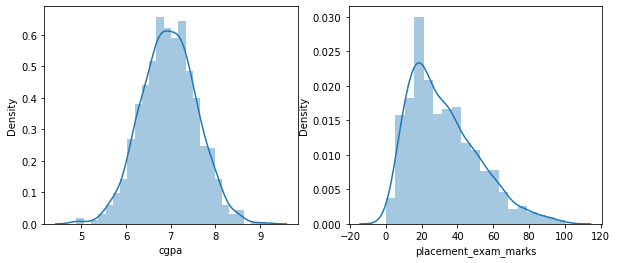

In [22]:
plt.figure(figsize=(10,4))


plt.subplot(1,2,1)
sns.distplot(df.cgpa)


plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [23]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [26]:
print('The mean value of cgpa column is :',df['cgpa'].mean())

print('The standard deviation value of cgpa column is :',df['cgpa'].std())

print('The minimum value of cgpa column is :',df['cgpa'].min())

print('The maximum value of cgpa column is :',df['cgpa'].max())

The mean value of cgpa column is : 6.96124000000001
The standard deviation value of cgpa column is : 0.6158978751323894
The minimum value of cgpa column is : 4.89
The maximum value of cgpa column is : 9.12


In [30]:
# Find the boundry values

print('The Highest value allowed :',df.cgpa.mean() + 3*df.cgpa.std())

print('The Lowest value allowed :',df.cgpa.mean() - 3*df.cgpa.std())

The Highest value allowed : 8.808933625397177
The Lowest value allowed : 5.113546374602842


In [42]:
# Find the outlier value

df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]


,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [49]:
new_df = df[(df.cgpa <8.80) & (df.cgpa > 5.11)]

new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [57]:
# z-score method

df['z-score'] = (df.cgpa - df.cgpa.mean()) / df.cgpa.std()

In [61]:
df.head()

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [64]:
# detecting outlier
df[df['z-score'] > 3]

,cgpa,placement_exam_marks,placed,z-score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [66]:
df[df['z-score'] < -3]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [70]:
df[(df['z-score'] > 3) | (df['z-score'] < -3)]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [75]:
# Trimming
new_df2 = df[(df['z-score'] > -3) & (df['z-score'] < 3)]

new_df2

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363



## Capping


In [83]:
# (df.cgpa.mean()) + 3*(df.cgpa.std())

upper_limit = (df['cgpa'].mean()) + 3*(df['cgpa'].std())

lower_limit = (df['cgpa'].mean()) - 3*(df['cgpa'].std())

print(upper_limit)
print(lower_limit)

8.808933625397177
5.113546374602842


In [88]:
df['cgpa'] = np.where(

    df['cgpa'] > upper_limit,
    
    upper_limit,
    
np.where(

    df['cgpa'] < lower_limit,
    lower_limit,
    df['cgpa']
)
)

In [89]:
df.cgpa.describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64